In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi

[0.+0.j 0.+0.j 1.+0.j 0.+0.j]


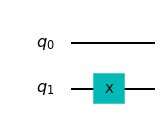

In [2]:
qc = QuantumCircuit(2)
qc.x(1)
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
print(result.get_statevector())
qc.draw('mpl')

#### NOTE: Four values in our state vector and notice that there is only one non-zero entry in the state vector

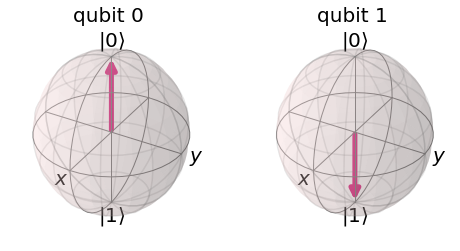

In [20]:
qc = QuantumCircuit(2)
qc.x(1)
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
plot_bloch_multivector(result.get_statevector())

In [15]:
qc = QuantumCircuit(2)
qc.x(1)
#We use the unitary_simulator backend. This backend produces the final matrix for circuit
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc, backend).result().get_unitary()
from qiskit_textbook.tools import array_to_latex
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

In [16]:
qc = QuantumCircuit(2)
#put the X gate on the first qubit we get slighty different
qc.x(0)
#We use the unitary_simulator backend. This backend produces the final matrix for circuit
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc, backend).result().get_unitary()

array_to_latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

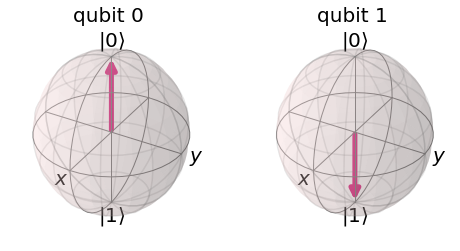

In [18]:
#CNOT
qc = QuantumCircuit(2)
qc.x(1)
qc.cx(0,1)#controlled not or CNOT is the basic 2 qubit gate
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
plot_bloch_multivector(result.get_statevector())

#### NOTE: If the control qubit only has the values |0> and |1> this gate basically behaves as a not when the control is |1>

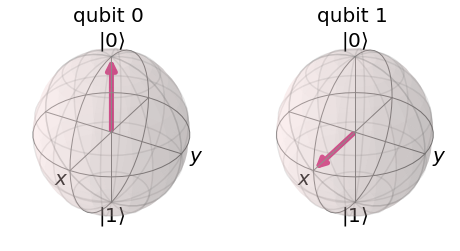

In [24]:
#CNOT
qc = QuantumCircuit(2)
qc.h(1)
qc.cz(0,1)#The cz gate behaves the same way along the X-axis
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
plot_bloch_multivector(result.get_statevector())

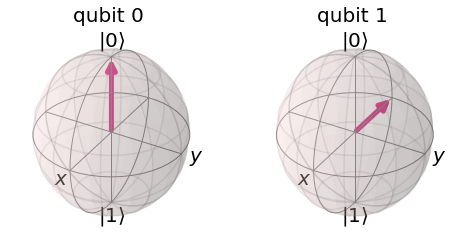

In [25]:
#CNOT
qc = QuantumCircuit(2)
qc.x(1)
qc.h(1)
qc.cz(0,1)#The cz gate behaves the same way along the X-axis
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
plot_bloch_multivector(result.get_statevector())

In [26]:
#CNOT
#Now lets return to the case of a superimposed control qubit, that is we apply the H gate to qubit zero
qc = QuantumCircuit(2)
qc.h(0)
initial = execute(qc, backend).result().get_statevector()
array_to_latex(initial, pretext = "\\text{Initial state vector = }")
qc.cx(0,1)
final = execute(qc, backend).result().get_statevector()
array_to_latex(final, pretext = "\\text{Final state vector = }")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [28]:
#CNOT
#We can get another one by applying an X gate to the second qubit
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
initial = execute(qc, backend).result().get_statevector()
array_to_latex(initial, pretext = "\\text{Initial state vector = }")
qc.cx(0,1)
final = execute(qc, backend).result().get_statevector()
array_to_latex(final, pretext = "\\text{Final state vector = }")

#What is seen below is one of the Bell states that we saw in the lecture

<IPython.core.display.Math object>

<IPython.core.display.Math object>

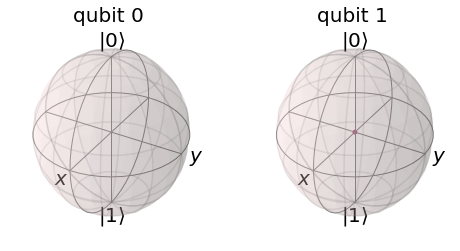

In [30]:
#CNOT
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
initial = execute(qc, backend).result().get_statevector()
qc.cx(0,1)
final = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(final)

'''What you see below is not a bug! In a completely entangled 
    state we know nothing about the states of the individual 
    quibits, we only know the state of the complete system
    
    So, there is nothing for the Bloch sphere to show, it has 
    information onthe individual qubits
    
    This is a bit suprising the first time that you get the 
    result, but it is in fact correct'''

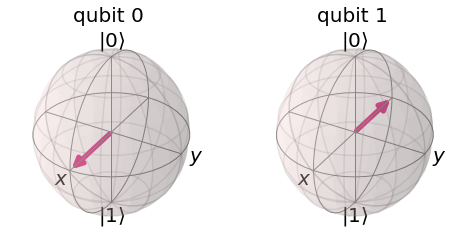

In [31]:
#Phases Kickback - Plotting the initial bloch sphere
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
initial = execute(qc, backend).result().get_statevector()
qc.cx(0,1)
final = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(initial)#Plotting the initial state of first qubit

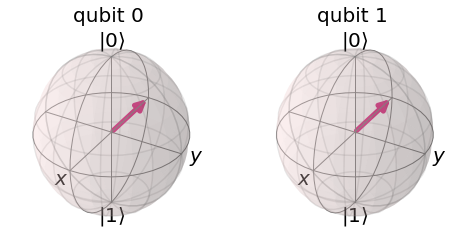

In [32]:
#Phase Kickback - Plotting the final bloch sphere
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
initial = execute(qc, backend).result().get_statevector()
qc.cx(0,1)
final = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(final)#Plotting the final state of first qubit

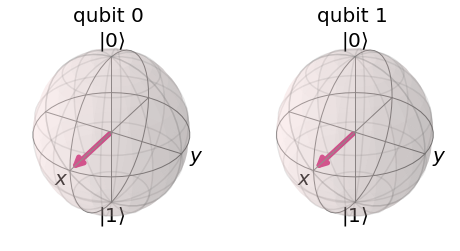

In [38]:
'''Again we see that it's the control qubit that changes
   
   If the second qubit is along the positive X axis, the first 
   qubit doesn't change so clearly the second qubit is the control
   one'''

#Phase Kickback - Plotting the final bloch sphere
qc = QuantumCircuit(2)
qc.h(0)
#qc.x(1)
qc.h(1)
initial = execute(qc, backend).result().get_statevector()
qc.cx(0,1)
final = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(final)#You will notice the no so clear change in the second qubit(control qubit)

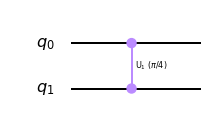

In [44]:
#Phase Kickback - setting up a controlled T gate
qc = QuantumCircuit(2)
#controlled not or CNOT is the basic 2 qubit gate. It is u1 with an extra parameter for control or the next qubit
qc.cu1(pi/4,0,1)# Like the "qc.u1(pi/4,0)" In this the first parameter is the radians and 2nd & 3rd are the qubits
qc.draw('mpl')